### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [40]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
#load data
df = pd.read_excel("https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'left')
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,NAMA,BIN,KDBIN,TGL_TRANS,NO_BKT,NO_ORD,STS_BYR,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,KET_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TRNBL,POST,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,KERTAS KADO SINAR DU,NaN,NaN,2017-01-02,060102001,NaN,CD,NaN,NaN,2.0,1100.0,NaN,549.98,1100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2200.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701022e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,PIGEON BTL PP RP 240,NaN,NaN,2017-01-02,060102002,NaN,CD,NaN,NaN,1.0,23000.0,NaN,20640.45,23000.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,23000.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701029e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,13.0,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,9500.0,NaN,8720.00,9500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,9500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701030e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,BIORE BF 100ML WHITE,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,6900.0,NaN,6215.00,6900.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,6900.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,OVALE LULUR BALI BEN,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,13500.0,NaN,12119.65,13500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,13500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [42]:
# info
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [43]:
# check missing values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'left')

df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
GDG,3
GGD,3
KDSLS,148489
KEL,3
ITEM,3


In [44]:
# describe
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,148486.000000,145702.000000,9350.000000,148486.000000,148486.000000,146957.000000,14695.000000,10753.000000,0.0,0.0,0.0,10879.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,146600.000000,9350.000000,9350.000000,9350.000000,1.484860e+05,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,3.163174,21828.817133,20286.487016,19901.017212,21795.990560,0.437617,2.995218,0.402527,NaN,NaN,NaN,22094.795018,1.848663,395.584588,387.137540,3.703390,0.339132,0.334158,3.749733,0.000160,0.001176,6.137361e+04,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,1.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,1.000000,4500.000000,4500.000000,3728.920000,4425.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,5000.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000e+03,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,1.000000,9700.000000,10302.000000,8365.180000,9600.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,11000.000000,0.000000,0.000000,184.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270000e+04,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,2.000000,20250.000000,19786.940000,17769.380000,20200.000000,0.000000,3.000000,0.000000,NaN,NaN,NaN,23000.000000,0.000000,0.000000,603.000000,4.000000,0.000000,0.000000,10.000000,0.000000,0.000000,3.060000e+04,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,2000.000000,700000.000000,517273.000000,720000.000000,900000.000000,50.000000,50.000000,31.400000,NaN,NaN,NaN,536900.000000,6250.000000,120600.000000,1769.000000,40.000000,31.400000,10.000000,10.000000,0.100000,9.000000,3.778570e+07,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,16.266576,40163.889928,34874.831844,38566.965857,40289.934102,2.475039,5.732793,1.739868,NaN,NaN,NaN,36368.941118,103.933377,2753.395563,471.396592,6.200473,1.727602,1.631778,4.841419,0.004002,0.095344,3.981378e+05,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


In [45]:
# null percentages
df.isnull().sum() / len(df) * 100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,0.002020
TP_TRN,0.002020
KDSUP,72.501667
KAS,8.212730
TRN_DK,0.002020
GDG,0.002020
GGD,0.002020
KDSLS,100.000000
KEL,0.002020
ITEM,0.002020


In [46]:
# Cleaning Data (Selecting relevant columns for apriori and association rules)
cleaned_data = df

selected_columns = ['ITEM', 'KEL', 'QTY', 'JLH_TRANS', 'TANGGAL', 'JAM', 'USER']
if all(column in cleaned_data.columns for column in selected_columns):
    cleaned_data = cleaned_data[selected_columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
cleaned_data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ITEM,3
KEL,3
QTY,3
JLH_TRANS,3
TANGGAL,3
JAM,3
USER,3


In [48]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

cleaned_data = pd.DataFrame(imputer.fit_transform(cleaned_data), columns=cleaned_data.columns)

cleaned_data.isnull().sum()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ITEM,0
KEL,0
QTY,0
JLH_TRANS,0
TANGGAL,0
JAM,0
USER,0


In [54]:
top_products = df.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(10)
print("\nTop-Selling Products:\n", top_products)


Top-Selling Products:
 KEL
MIE        40367.0
SUSU KT    34392.0
SUSU       30108.0
SABUN.M    18827.0
PAMPERS    18538.0
SNACK      16815.0
MINUMAN    16601.0
BISCPAK    14648.0
AIR.M      12717.0
DETERJN    12106.0
Name: QTY, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


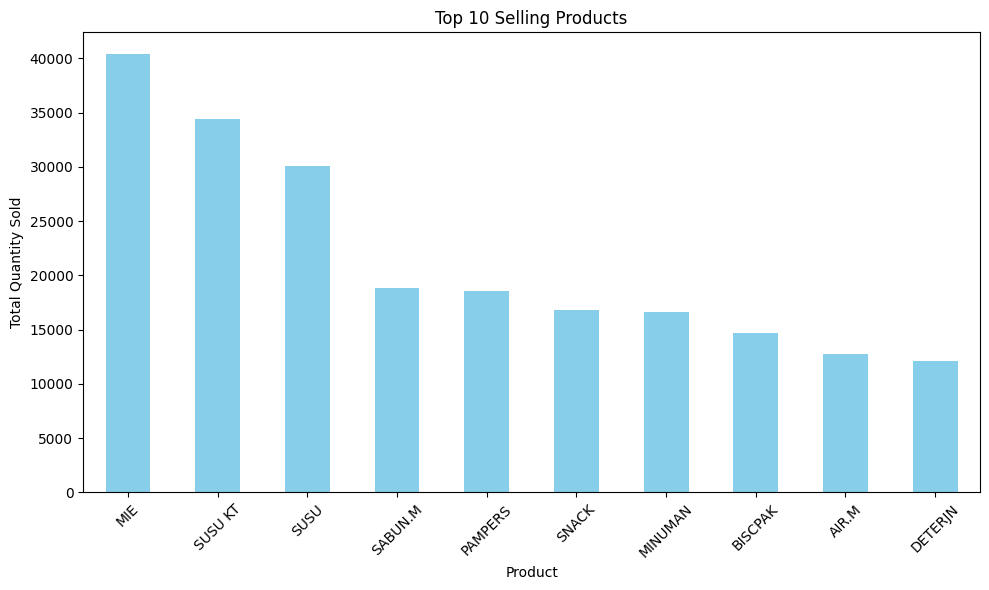

In [50]:
# Visualization: Top Selling Products
top_products = cleaned_data.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


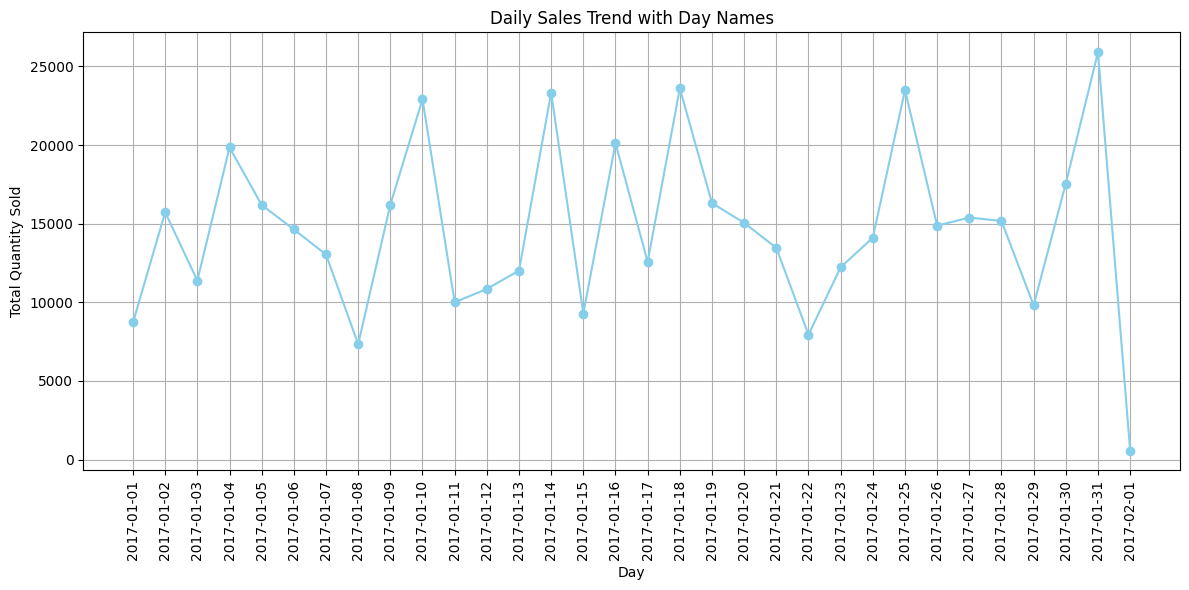

In [51]:
# Visualization: Seasonality Trends for January
cleaned_data['Day'] = cleaned_data['TANGGAL'].dt.date
cleaned_data['DayName'] = cleaned_data['TANGGAL'].dt.day_name()
daily_trend = cleaned_data.groupby(['Day', 'DayName'])['QTY'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_trend['Day'].astype(str), daily_trend['QTY'], marker='o', color='skyblue')
plt.title('Daily Sales Trend with Day Names')
plt.xlabel('Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()